In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from matplotlib import style
from sklearn.decomposition import PCA
import matplotlib.cm as cm
from sklearn.preprocessing import PolynomialFeatures
from matplotlib import *

In [2]:
house = pd.read_csv("kc_house_data.csv")
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
print(house.shape)

(21613, 21)


In [4]:
list(house.columns.values)

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [5]:
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated','zipcode','lat','long','sqft_living15','sqft_lot15']

In [8]:
feature_matrix = house[features]
#feature_matrix = preprocessing.scale(feature_matrix)
feature_matrix_unscaled = house[features]
lable_vector = house['price']
feature_matrix_unscaled.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Correlation using heatmap

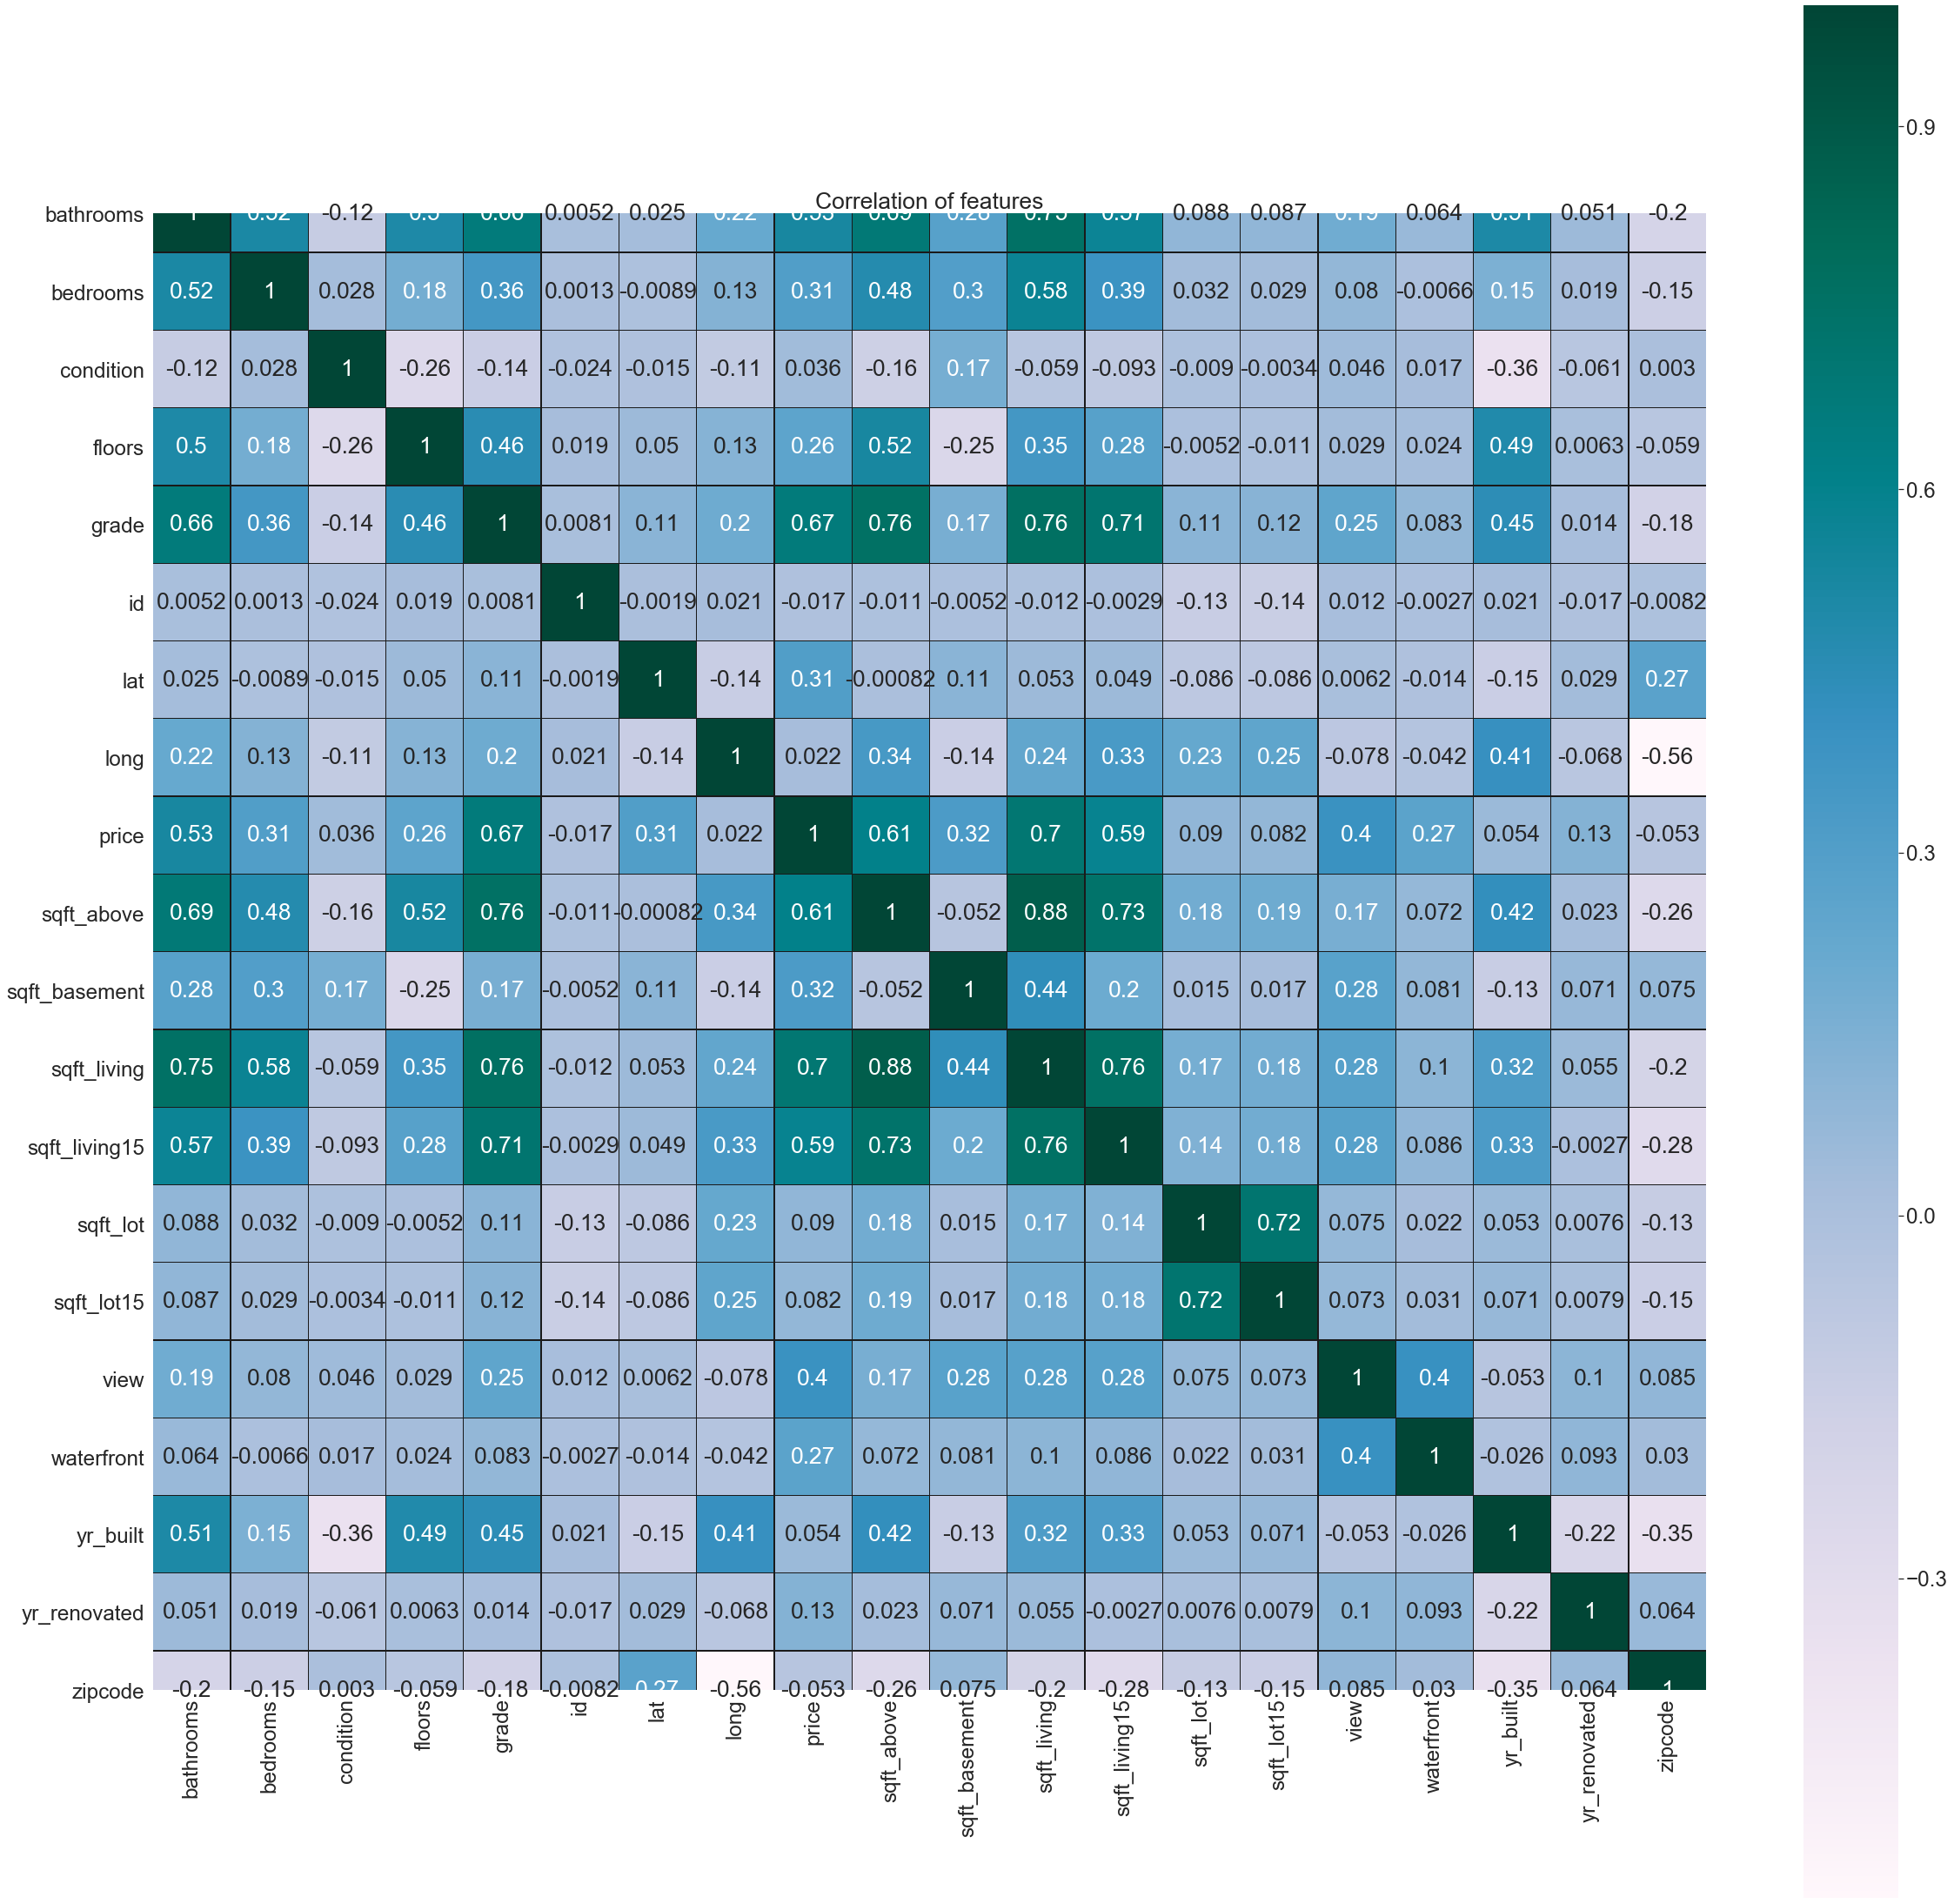

In [11]:
sns.set(font_scale=2.2)
str_list = [] # empty list to contain columns with strings (words)
for colname, colvalue in house.iteritems():
   if type(colvalue[1]) == str:
        str_list.append(colname)
# Get to the numeric columns by inversion            
num_list = house.columns.difference(str_list) 
# Create Dataframe containing only numerical features
house_num = house[num_list]
f, ax = plt.subplots(figsize=(40, 40))
plt.title('Correlation of features')
# Draw the heatmap using seaborn
sns.heatmap(house_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="PuBuGn", linecolor='k', annot=True)
plt.show()

## Getting insight of data using scatter plot (Feature vs Price)

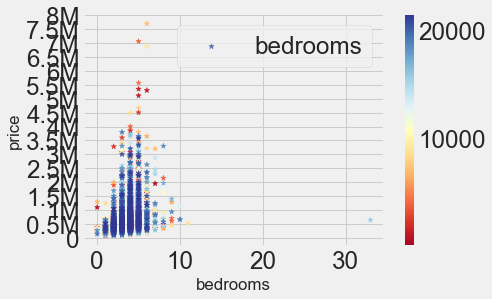

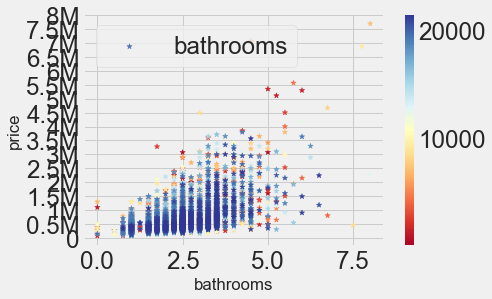

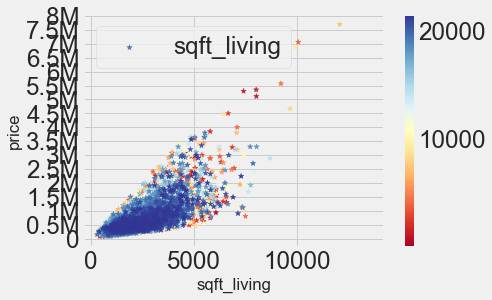

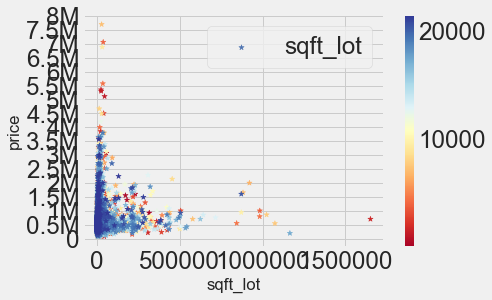

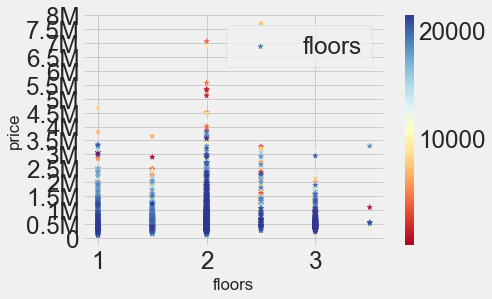

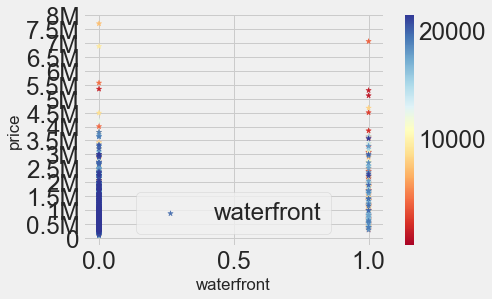

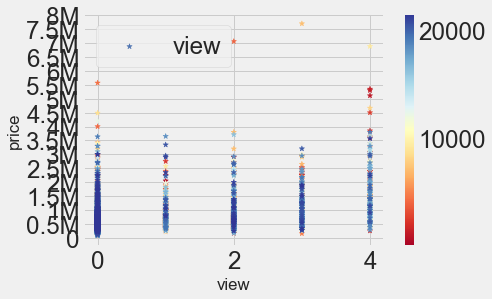

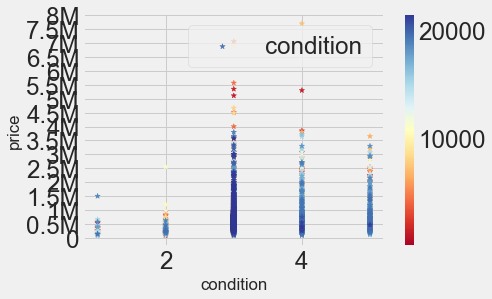

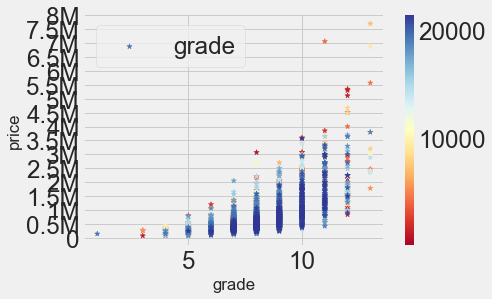

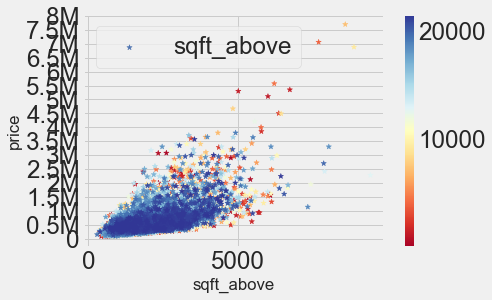

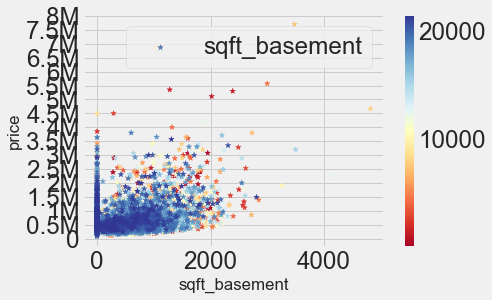

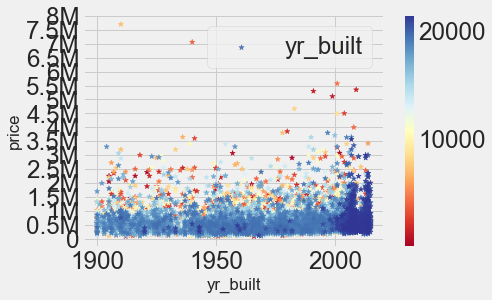

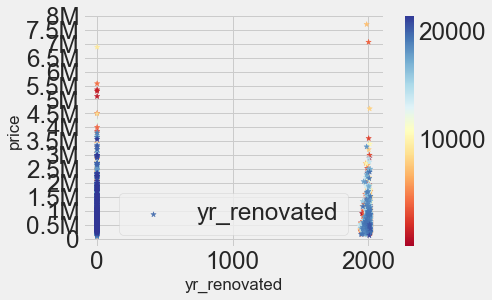

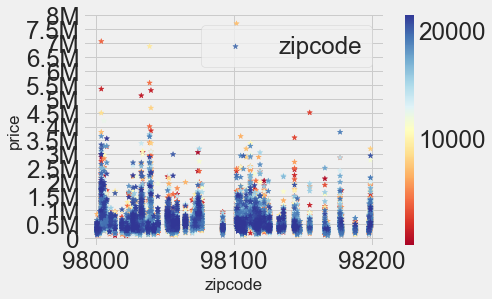

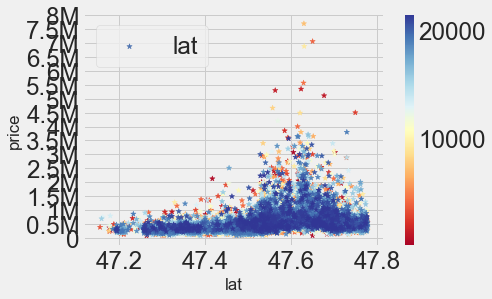

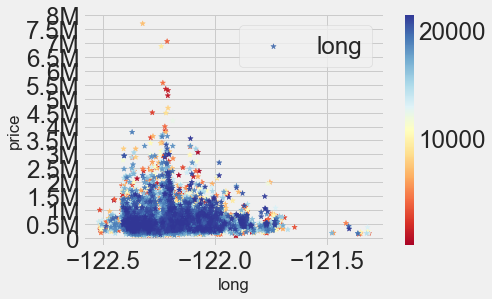

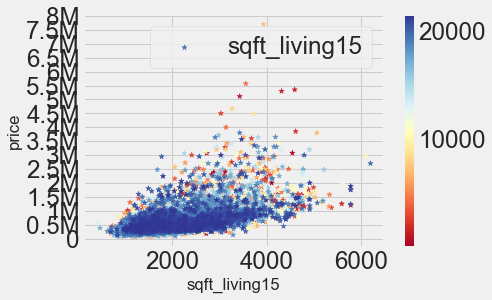

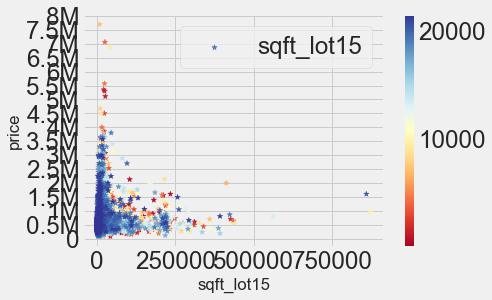

In [21]:
style.use('fivethirtyeight')
cm = plt.cm.get_cmap('RdYlBu')
xy = range(1,21614)
z = xy
for feature in feature_matrix_unscaled:
    sc = plt.scatter(house[feature], house['price'], label = feature, c = z, marker = '*', s = 30, cmap = cm)
    plt.colorbar(sc)
    plt.xlabel(''+feature)
    plt.ylabel('price')
    plt.yticks([0, 500000, 1000000, 1500000, 2000000, 2500000, 3000000, 3500000, 4000000, 4500000, 5000000, 5500000, 6000000, 6500000, 7000000, 7500000, 8000000],
            ['0', '0.5M', '1M', '1.5M', '2M', '2.5M', '3M',  '3.5M', '4M', '4.5M', '5M', '5.5M', '6M', '6.5M', '7M', '7.5M', '8M',])
    plt.legend()
    plt.show()

## Linear regression

In [15]:
my_linear = LinearRegression()

In [17]:
my_linear.fit(feature_matrix, lable_vector)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
# printing Theta0 using attribute "intercept_":
print(my_linear.intercept_)

# printing [Theta1, Theta2, Theta3] using attribute "coef_":
print(my_linear.coef_)
coef_list = my_linear.coef_
# coef_list.sort()
print(coef_list)

6690324.60309374
[-3.57665414e+04  4.11442785e+04  1.10442865e+02  1.28597869e-01
  6.68955012e+03  5.82960458e+05  5.28709424e+04  2.63856491e+04
  9.58904452e+04  7.07852244e+01  3.96576400e+01 -2.62022321e+03
  1.98125837e+01 -5.82419866e+02  6.02748226e+05 -2.14729828e+05
  2.16814005e+01 -3.82641850e-01]
[-3.57665414e+04  4.11442785e+04  1.10442865e+02  1.28597869e-01
  6.68955012e+03  5.82960458e+05  5.28709424e+04  2.63856491e+04
  9.58904452e+04  7.07852244e+01  3.96576400e+01 -2.62022321e+03
  1.98125837e+01 -5.82419866e+02  6.02748226e+05 -2.14729828e+05
  2.16814005e+01 -3.82641850e-01]


## Sorting features based on co-efficient values from linear regression.

In [23]:
feature_dict = dict(zip(features, coef_list))
#print(feature_dict)
import operator
sorted_d = sorted(feature_dict.items(), key=operator.itemgetter(1),reverse=True)
print('Dictionary in descending order by value : ',sorted_d)

Dictionary in descending order by value :  [('lat', 602748.2264485597), ('waterfront', 582960.4584234749), ('grade', 95890.44515147124), ('view', 52870.94238431607), ('bathrooms', 41144.27853244573), ('condition', 26385.64913859817), ('floors', 6689.550115077948), ('sqft_living', 110.44286453230718), ('sqft_above', 70.78522440329884), ('sqft_basement', 39.65764003805269), ('sqft_living15', 21.681400461465618), ('yr_renovated', 19.812583709272737), ('sqft_lot', 0.12859786912634794), ('sqft_lot15', -0.3826418495445978), ('zipcode', -582.4198656401529), ('yr_built', -2620.2232112952815), ('bedrooms', -35766.541443671915), ('long', -214729.8282532471)]


## Checking best features vs price using pairplot

C:\Users\KC\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


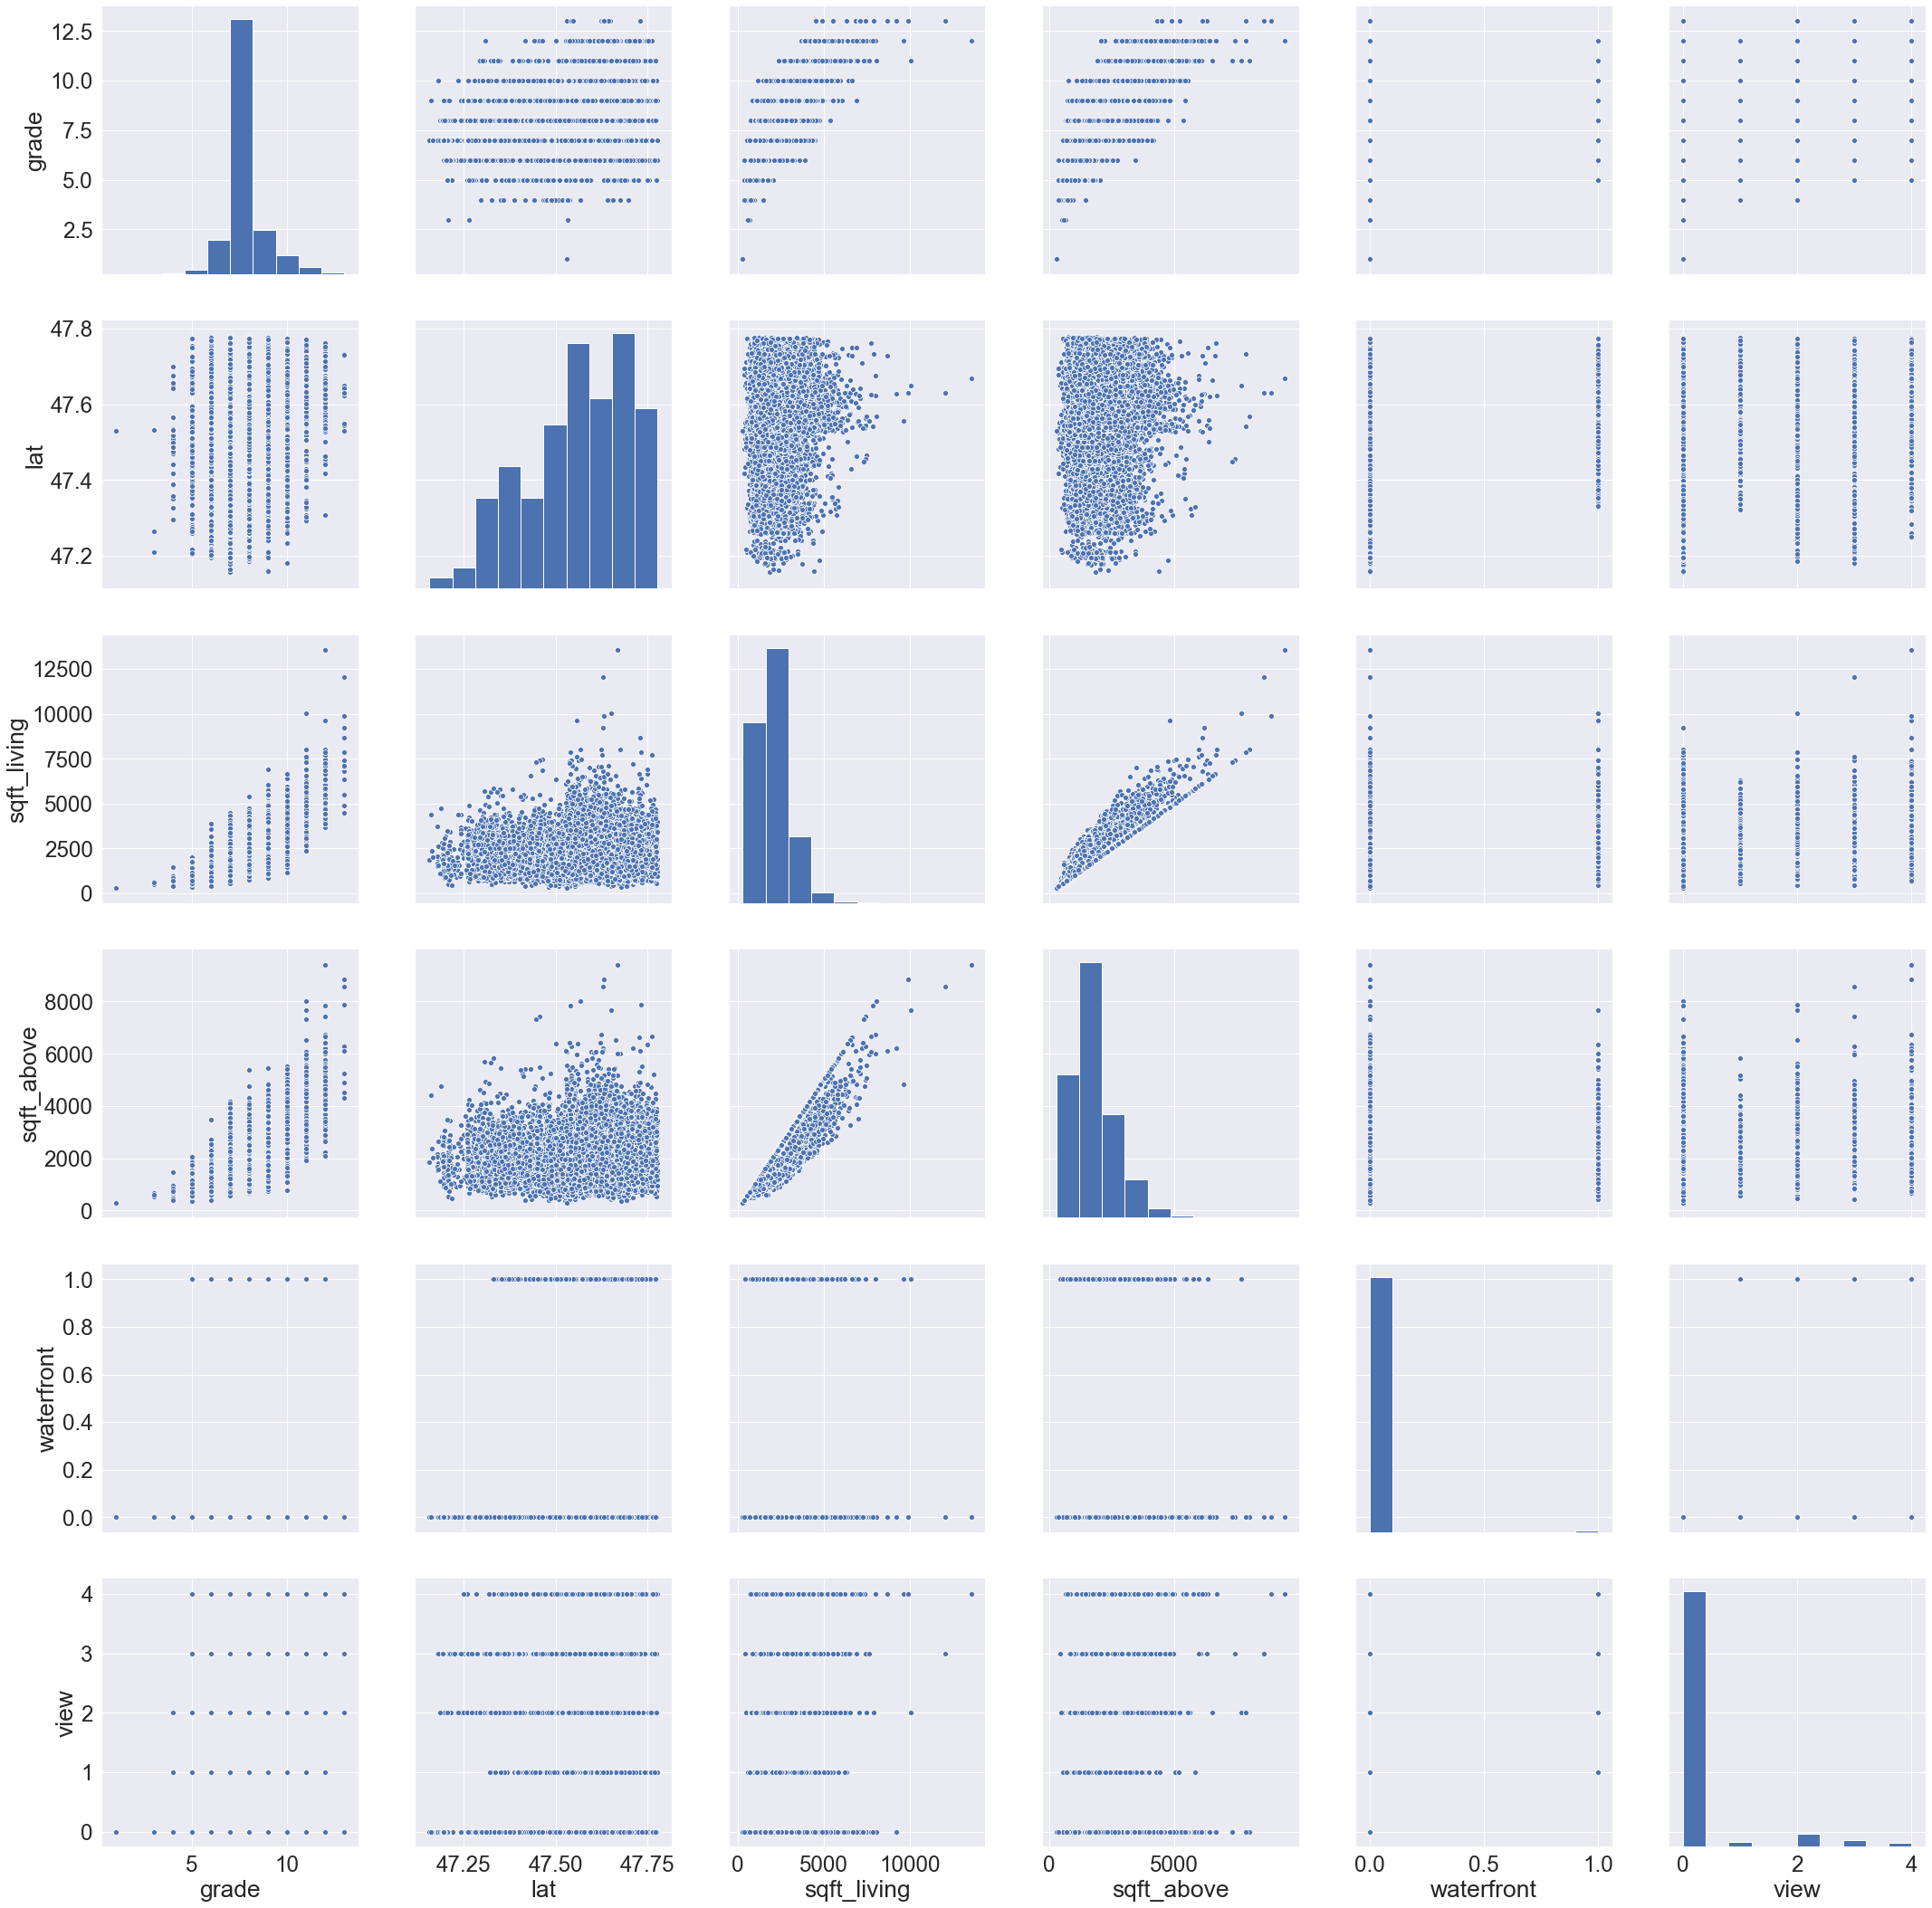

In [25]:
sorted_features = ['grade','lat','sqft_living','sqft_above','waterfront','view']
sns.set(font_scale=2.2)
g = sns.pairplot(house[sorted_features] ,size=5)
plt.show()

In [26]:
sorted_features = ['grade','lat','sqft_living','sqft_above','waterfront','view']
best_feature_matrix = house[sorted_features]
#scaling deature
#best_feature_matrix = preprocessing.scale(best_feature_matrix)

X_train, X_test, y_train, y_test = train_test_split(best_feature_matrix, lable_vector, test_size=0.3, random_state=3)
my_linear.fit(X_train, y_train)
y_predict_ln = my_linear.predict(X_test)
print(y_predict_ln)

[ 603611.88117235 1101117.7972132   833606.46564247 ...  205362.38746928
  364435.62431651  356653.08720786]


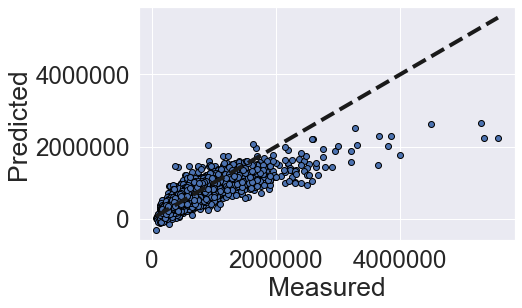

In [36]:
y_predict_ln = my_linear.predict(X_test)
fig, ax = plt.subplots()
ax.scatter(y_test, y_predict_ln, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [35]:
error = mean_squared_error(y_test, y_predict_ln)
root_mean_square_error = np.sqrt(error)
print("RMSE for liner regression>>>",root_mean_square_error)

RMSE for liner regression>>> 213098.2225629471


## KNN

In [37]:
k = 25
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_predict_knn = knn.predict(X_test)
score_knn = accuracy_score(y_test, y_predict_knn)
print("KNN accuracy>>>>",score_knn)

KNN accuracy>>>> 0.005243676742751388


## Decision tree

In [38]:
my_decisiontree = DecisionTreeClassifier()
my_decisiontree.fit(X_train, y_train)
y_predict_dt = my_decisiontree.predict(X_test)
score_dt= accuracy_score(y_test, y_predict_dt)
print("Decision tree accuracy>>>>",score_dt)

Decision tree accuracy>>>> 0.0077112893275755705


## Cross validation

In [40]:
kc_linear_reg = LinearRegression()
new_feature_marrix = preprocessing.scale(feature_matrix)
kc_mse = cross_val_score(kc_linear_reg,new_feature_marrix,lable_vector, cv=10, scoring='neg_mean_squared_error')


house_mse_positive = -kc_mse

house_rmse = np.sqrt(house_mse_positive)

print("RMSE for cross validation>>>",house_rmse.mean())

RMSE for cross validation>>> 201992.39054119986


## Random forest

In [41]:
my_RandomForest = RandomForestClassifier(n_estimators = 10, bootstrap = True, random_state=2)
my_RandomForest.fit(X_train,y_train) #train random forest classifier using training data
y_predict_rf=my_RandomForest.predict(X_test) #predict using testing data
score_rf=accuracy_score(y_test, y_predict_rf) #accuracy based on predicted values and original values
print("Accuracy for Random Forest>>>>> ",score_rf)

Accuracy for Random Forest>>>>>  0.010333127698951264


## PCA

In [42]:
n=6
my_pca = PCA(n_components=n)
feature_matrix_scaled = preprocessing.scale(feature_matrix)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(feature_matrix_scaled, lable_vector, test_size=0.3, random_state=3)

In [43]:
X_Train_new = my_pca.fit_transform(X_train_pca)
X_Test_new = my_pca.transform(X_test_pca)
print(X_Test_new.shape)
my_linear = LinearRegression()

(6484, 6)


In [44]:
my_linear.fit(X_Train_new, y_train_pca)
y_predict_ln = my_linear.predict(X_Test_new)#score_lr = accuracy_score(y_test, y_predict_ln)
error = mean_squared_error(y_test_pca, y_predict_ln) 
root_mean_square_error = np.sqrt(error) 
print("RMSE for PCA>>>>>>>",root_mean_square_error)

RMSE for PCA>>>>>>> 230707.68278458648


## Coefficient of determination

In [47]:
house['year_sell'] = [int(i[:4]) for i in house.date]

house.year_sell.value_counts().sort_index()


#test=kc_df[kc_df.year_sell==2015].reset_index(drop=True )
train=house[house.year_sell==2014].reset_index(drop=True )
x=train[house.columns.drop(['price','id','date'])]
y=train['price']
col=house.columns.drop(['price','id','date'])
clf = LinearRegression()
clf.fit(x,y)
score_dt = clf.score(x,y)
print("Determination>>>>>>",score_dt)

Determination>>>>>> 0.7072063380899669


## Adding features by taking square of each feature

In [48]:
house_square = pd.DataFrame()
for feature in features:
    house_square[feature + '_square'] = house[feature]*house[feature]
print(house_square.shape)

(21613, 18)


In [49]:
square_df = pd.concat([feature_matrix_unscaled, house_square], axis=1)
square_df.shape

(21613, 36)

In [50]:
#normalize data
scaled_square_df = preprocessing.scale(square_df)

C:\Users\KC\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


## PCA on squared data

In [51]:
n=7
my_pca = PCA(n_components=n)
X_train_square, X_test_square, y_train_square, y_test_square = train_test_split(scaled_square_df, lable_vector, test_size=0.3, random_state=3)

In [52]:
X_Train_new = my_pca.fit_transform(X_train_square)
X_Test_new = my_pca.transform(X_test_square)
my_linear_squared = LinearRegression()

In [53]:
my_linear_squared.fit(X_Train_new, y_train_square)
y_predict_sq = my_linear_squared.predict(X_Test_new)#score_lr = accuracy_score(y_test, y_predict_ln)
error = mean_squared_error(y_test_square, y_predict_sq) 
root_mean_square_error = np.sqrt(error) 
print("RMSE for squared PCA>>>>>>>",root_mean_square_error)

RMSE for squared PCA>>>>>>> 204103.32455399077


## Cross validation on squared data

In [54]:
kc_linear_reg_square = LinearRegression()
kc_mse = cross_val_score(kc_linear_reg,scaled_square_df,lable_vector, cv=10, scoring='neg_mean_squared_error')


house_mse_positive = -kc_mse

house_rmse = np.sqrt(house_mse_positive)

print("RMSE for squared cross validation>>>",house_rmse.mean())

RMSE for squared cross validation>>> 187768.35725537053


## Polynomial Regression

In [55]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)
#print(X_train_poly.shape)
poly_lin_reg = LinearRegression()
poly_lin_reg.fit(X_train_poly, y_train)
y_predict_poly = poly_lin_reg.predict(X_test_poly)
print(y_predict_poly)

[ 542076.26957798 1149612.35075855  813265.75338364 ...  285320.81260109
  288119.67028809  360417.7574873 ]


In [56]:
error = mean_squared_error(y_predict_poly, y_test)
#print(error)
root_mean_square_error = np.sqrt(error)
print("RMSE for polynomial regression>>>>>>>>",root_mean_square_error)

RMSE for polynomial regression>>>>>>>> 184575.0834805233


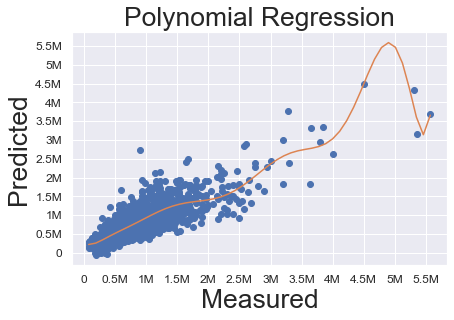

In [59]:
z = np.polyfit(y_test,y_predict_poly,10) 

p = np.poly1d(z)

plt.title ('Polynomial Regression')
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.yticks([0, 500000, 1000000, 1500000, 2000000, 2500000, 3000000, 3500000, 4000000, 4500000, 5000000, 5500000, 6000000, 6500000, 7000000, 7500000, 8000000],
            ['0', '0.5M', '1M', '1.5M', '2M', '2.5M', '3M',  '3.5M', '4M', '4.5M', '5M', '5.5M', '6M', '6.5M', '7M', '7.5M', '8M'], fontsize = 12)
plt.xticks([0, 500000, 1000000, 1500000, 2000000, 2500000, 3000000, 3500000, 4000000, 4500000, 5000000, 5500000, 6000000, 6500000, 7000000, 7500000, 8000000],
            ['0', '0.5M', '1M', '1.5M', '2M', '2.5M', '3M',  '3.5M', '4M', '4.5M', '5M', '5.5M', '6M', '6.5M', '7M', '7.5M', '8M'], fontsize = 12)
    

#plt.plot(y_test[:100], y_predict_poly[:100],'o-')
#plt.plot(y_test[:5], y_predict_poly[:5], '-')

datax_os = np.linspace(y_test.min(), y_test.max(), 50)
#plt.figure(figsize=(18,18))

plt.plot(y_test, y_predict_poly, 'o',datax_os, p(datax_os) ) # 'smoother' line

plt.show()